In [1]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt

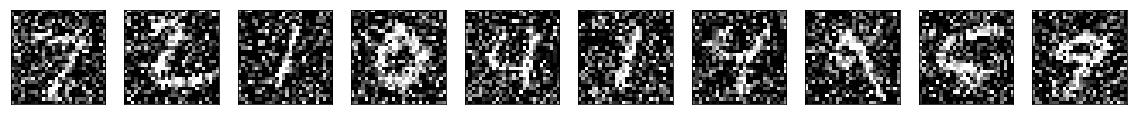

In [5]:
n = 10

plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

In [18]:
from keras.callbacks import TensorBoard

In [19]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [20]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 112us/step - loss: 0.1879 - val_loss: 0.1277
Epoch 2/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1210 - val_loss: 0.1128
Epoch 3/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1129 - val_loss: 0.1087
Epoch 4/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1086 - val_loss: 0.1044
Epoch 5/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1060 - val_loss: 0.1036
Epoch 6/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1045 - val_loss: 0.1028
Epoch 7/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.1034 - val_loss: 0.1015
Epoch 8/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.1027 - val_loss: 0.1014
Epoch 9/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.1021 - val_

60000/60000 [==============================] - 6s 103us/step - loss: 0.0949 - val_loss: 0.0942
Epoch 77/100
60000/60000 [==============================] - 6s 104us/step - loss: 0.0948 - val_loss: 0.0945
Epoch 78/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0948 - val_loss: 0.0946
Epoch 79/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0948 - val_loss: 0.0944
Epoch 80/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0947 - val_loss: 0.0942
Epoch 81/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0947 - val_loss: 0.0940
Epoch 82/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0947 - val_loss: 0.0939
Epoch 83/100
60000/60000 [==============================] - 6s 103us/step - loss: 0.0947 - val_loss: 0.0939
Epoch 84/100
60000/60000 [==============================] - 6s 102us/step - loss: 0.0946 - val_loss: 0.0939
Epoch 85/100
60000/60000 [===============

In [21]:
decoded_imgs = autoencoder.predict(x_test)

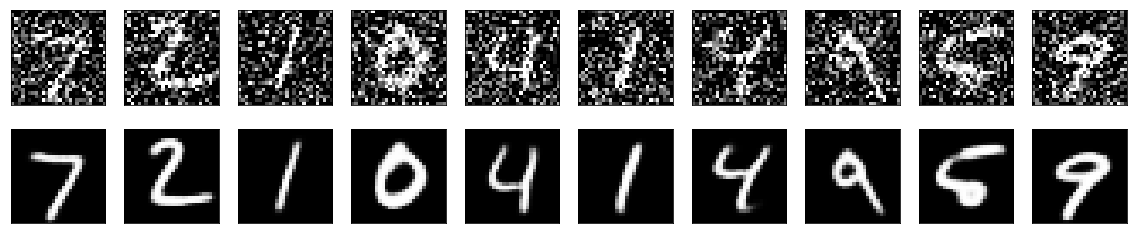

In [23]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()